<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Очистка-данных" data-toc-modified-id="Очистка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Очистка данных</a></span><ul class="toc-item"><li><span><a href="#Очистка" data-toc-modified-id="Очистка-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Очистка</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Разделим-данные-на-трейн-и-тест" data-toc-modified-id="Разделим-данные-на-трейн-и-тест-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Разделим данные на трейн и тест</a></span></li><li><span><a href="#Переведем-текст-в-вектор" data-toc-modified-id="Переведем-текст-в-вектор-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Переведем текст в вектор</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>XGBClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
#!pip install wordcloud profanity-check
#!pip install alt-profanity-check
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
!pip install wordcloud


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

import spacy
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from collections import Counter

from tqdm import tqdm

import re

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')


import seaborn as sns
import wordcloud
from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


from scipy import sparse
from scipy.sparse import hstack
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostClassifier

from scipy import sparse
from scipy.sparse import hstack
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from scipy import sparse
from scipy.sparse import hstack
from sklearn import svm

from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/twobeeornot2be/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/twobeeornot2be/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Подготовка

Проведем небольшой EDA

In [4]:
filename = 'toxic_comments.csv'
#df = pd.read_csv(f'https://code.s3.yandex.net/datasets/{filename}')
try:
    df = pd.read_csv(f'/datasets/{filename}')
except:
    df = pd.read_csv(f'datasets/{filename}')

df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Посмотрим на данные:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Посмотрим на длины комментариев

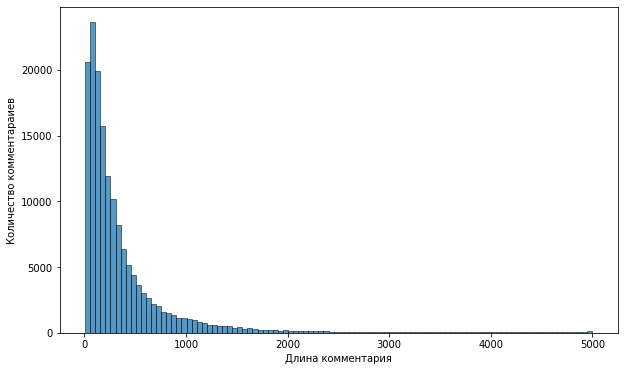

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=df.text.str.len(), bins=100, ax=ax)
ax.set_xlabel('Длина комментария')
ax.set_ylabel('Количество комментараиев')
plt.show()

Посмотрим на облако слов  - это может помочь понять по какому принципу комментариям присваивался токсичный статус.

In [7]:
def drawWordCloud(data):
    allWords = ' '.join([word for word in data])
    wordCloud = WordCloud(
        width=500, 
        height=300, 
        random_state=42, 
        max_font_size=110, 
        max_words=100, 
        collocations=False, #запретим повторения слов
        background_color="white").generate(allWords)
    
    return wordCloud

In [8]:
%%time

word_cloud_raw = list()

word_cloud_raw.append(drawWordCloud(df.text))
word_cloud_raw.append(drawWordCloud(df[df.toxic==1].text))
word_cloud_raw.append(drawWordCloud(df[df.toxic==0].text))

CPU times: user 9.73 s, sys: 1.21 s, total: 10.9 s
Wall time: 9.96 s


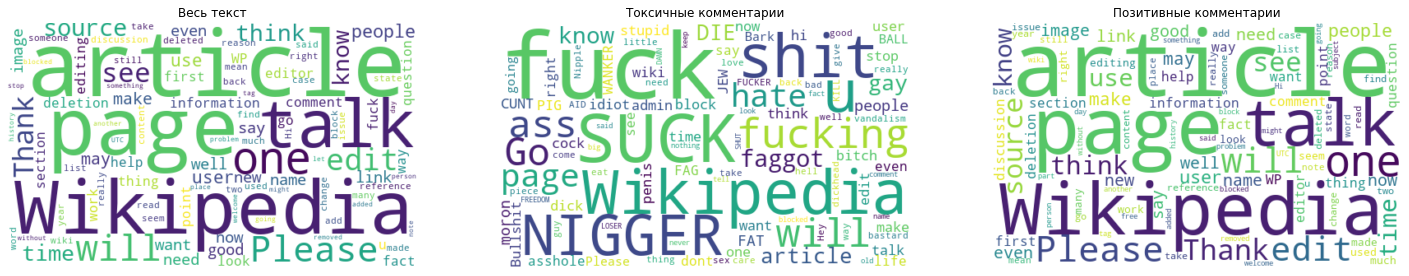

In [9]:
labels = ['Весь текст', 'Токсичные комментарии', 'Позитивные комментарии']


fig, axs = plt.subplots(figsize=(25,15), nrows=1, ncols=3, sharex=True,sharey=False, )

for wci in range(3):
    axs[wci].imshow(word_cloud_raw[wci], interpolation="bilinear")
    axs[wci].axis('off')
    axs[wci].set_title(labels[wci])
    
plt.show()

Видно преобладание обсцентной лексики в токсичных текстах (внезапно). Кроме того, все любят ссылаться на википедию - вне зависимости от контекста и настроения

Посмотрим на соотношение классов

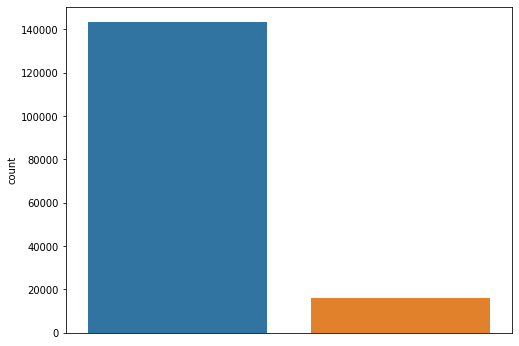

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x='toxic',  ax=ax)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlabel('Соотношение классов')
plt.show()

И цифрой:

In [11]:
df.toxic.sum()/df.toxic.shape[0]

0.10167887648758234

По результатам анализа:
- пропусков нет
- наблюдается дисбаланс классов
- значение таргета `1` соответствуют токсичным комментариям

### Очистка данных

Для дальнейшего анализа нам необходимо очистить тест от служебных слов и служебных символов

#### Очистка

In [12]:
def clean(text):
    
    text = text.lower()    
    text = re.sub(r"(?:\n|\r)", " ", text)
    text = re.sub(r'http\S+', ' ', text)   # remove urls
    text = re.sub(r'<.*?>',' ', text)      # remove html tags
    text = re.sub(r'\d+',' ', text)        # remove digits
    text = re.sub(r'#\w+',' ', text)       # remove hashtags
    text = re.sub(r'@\w+',' ', text)       # remove mentions
    text = re.sub(r'[^\w\s]',' ', text)    # remove punctuation
    text = re.sub(r"[^a-zA-Z ]+", "", text).strip()
    
    return text

In [13]:
df['clean_text'] = df['text'].apply(clean)

#### Лемматизация

Проведем лемматизацию очищенного текста при помощи `spacy` и удалим стоп-слова

In [14]:
nlp = spacy.load('en_core_web_sm')

#features = []
#labels = []
lemma_text = []


print(len(df))

for i, row in tqdm(df.iterrows()):

    result = nlp(row['clean_text']) 

    #features.append(result.vector)
    #labels.append(row['toxic'])

    lemma_text.append(" ".join([token.lemma_ for token in result if (
        (token.lemma_.lower() not in nlp.Defaults.stop_words) 
        and (token.is_alpha) 
        and (len(token.lemma_.lower()) > 1))]))


df['lemma_text'] = lemma_text  

159571


159571it [34:02, 78.12it/s] 


Построим гистограмму количества слов в комментариях

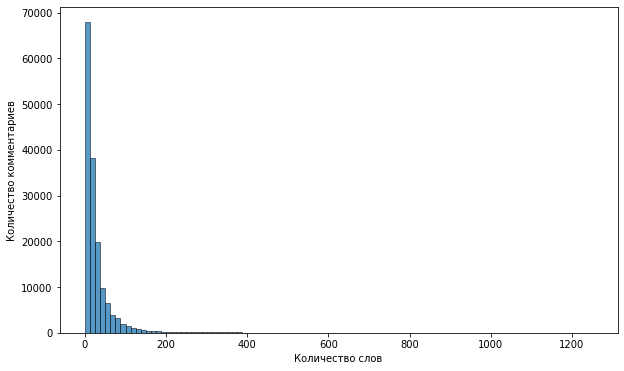

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=df.lemma_text.apply(lambda x: len(x.split())), bins=100, ax=ax)
ax.set_xlabel('Количество слов')
ax.set_ylabel('Количество комментариев')
plt.show()

Все распределения выглядят хорошо, без выбросов. Начнем строить модели

#### Разделим данные на трейн и тест

In [16]:
features = df.drop('toxic', axis=1)
target = df['toxic']


features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    random_state=42, 
    test_size=0.25,
    stratify=target)

In [17]:
X_train_char = features_train['lemma_text'].values
X_test_char = features_test['lemma_text'].values

#### Переведем текст в вектор

In [23]:
stop_words=stopwords.words('english')
#tf_idf = TfidfVectorizer(stop_words=stop_words)

In [24]:
# %%time
#X_train = tf_idf.fit_transform(X_train_char)
#X_test = tf_idf.transform(X_test_char)

#y_train, y_test = target_train, target_test


X_train = X_train_char
X_test = X_test_char

y_train, y_test = target_train, target_test

## Обучение

Напишем вспомогательную функцию для представления результатов:

In [25]:
def drawConfusionMatrix(predict_value, actual_value):

    f1_scor = f1_score(predict_value, actual_value)
    acc_scor = accuracy_score(predict_value, actual_value)
    pr_scor = precision_score(predict_value, actual_value)
    rec_scor = recall_score(predict_value, actual_value)
    
    
    print(f'f1 score: {f1_scor}')
    print(f'accuracy score: {acc_scor}')
    print(f'precision score: {pr_scor}')
    print(f'recall score: {rec_scor}')

    plt.figure(figsize=(7,7))

    ax = sns.heatmap(confusion_matrix(actual_value,predict_value)/actual_value.shape[0]*100.0,
                     annot=True,  cmap='Blues')
    ax = ax.set(xlabel='Predicted Values',ylabel='Actual Values',title='Confusion Matrix',
                xticklabels=(['True', 'False']),
                yticklabels=(['True', 'False']))

    plt.show()
    
    return f1_scor

#### LogisticRegression

Попробуем подобрать параметры для логистической регрессии

In [26]:
%%time

pipe_lr = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('model', LogisticRegression(random_state=42, class_weight='balanced'))])
                    
                    
random_grid_param ={
    
    'model__max_iter' : range(500, 700),
    'model__warm_start' : [True, False],
    'model__solver' : ['lbfgs', 'newton-cg', 'liblinear'],
    'model__C' : np.arange(0.0001, 1, 0.1),
}
                    
                    
result_lr = RandomizedSearchCV(estimator = pipe_lr,
                                   param_distributions = random_grid_param,
                                   n_iter = 10,
                                   scoring = 'f1',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 42,
                                  )


result_lr.fit(X_train_char, target_train)


print(f"best params: {result_lr.best_params_}")

best_lr_model = result_lr.best_estimator_

best_lr_model.fit(X_train_char, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best params: {'model__warm_start': True, 'model__solver': 'lbfgs', 'model__max_iter': 694, 'model__C': 0.9001}
CPU times: user 5.97 s, sys: 871 ms, total: 6.85 s
Wall time: 26.6 s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model',
                 LogisticRegression(C=0.9001, class_weight='balanced',
                                    max_iter=694, random_state=42,
                                    warm_start=True))])

f1 score: 0.7490877870787722
accuracy score: 0.9413932268819091
precision score: 0.8604536489151874
recall score: 0.6632459141011022


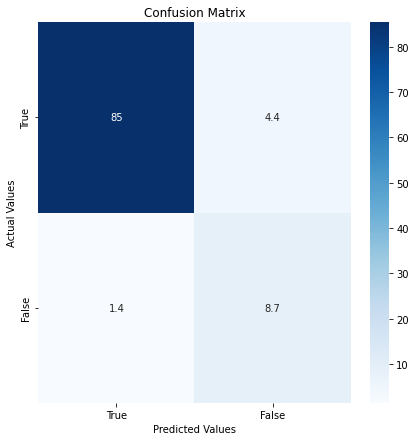

In [27]:
predict_lr = best_lr_model.predict(X_test_char)

f1_logistic = drawConfusionMatrix(predict_lr, target_test)

#### XGBClassifier

Подбор параметров для градиентного бустинга

In [28]:
%%time

pipe_xgb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('model', xgboost.XGBClassifier(n_estimators=500, random_state=42))])
                    


random_grid_param = {
 "model__learning_rate" : [0.1 ,0.2, 0.3, 0.4, 0.6],
 "model__max_depth" : [5, 7, 11, 17, 21],
}


result_xgb = RandomizedSearchCV(estimator = pipe_xgb,
                                   param_distributions = random_grid_param,
                                   n_iter = 1,
                                   scoring = 'f1',
                                   n_jobs = -1,
                                   verbose = 10, 
                                   random_state = 42,
                                  )


result_xgb.fit(X_train, y_train)


print(f"best params: {result_xgb.best_params_}")

best_xgb_model = result_xgb.best_estimator_

best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
best params: {'model__max_depth': 17, 'model__learning_rate': 0.2}
CPU times: user 27min 6s, sys: 1min 42s, total: 28min 48s
Wall time: 12min 8s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=N...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=17, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

f1 score: 0.7775041050903121
accuracy score: 0.959240969593663
precision score: 0.7004437869822485
recall score: 0.8736162361623616


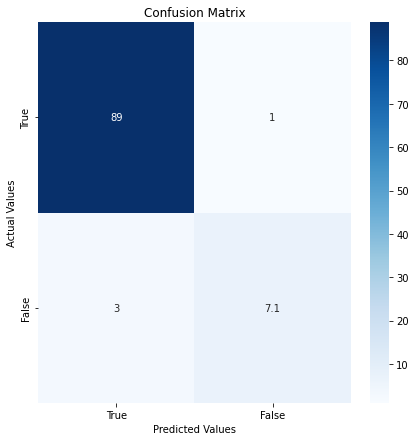

In [29]:
predict_xgb = best_xgb_model.predict(X_test)

f1_xgb = drawConfusionMatrix(predict_xgb, y_test)

#### RandomForestClassifier 

In [30]:
%%time

#model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

pipe_rf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('model', RandomForestClassifier(n_estimators=100, random_state=42))])


random_grid_param = {  
             'model__max_depth': [3, 7, 11, 15, 10, 20],
             'model__min_samples_leaf': [1, 2, 4, 8],
             'model__min_samples_split': [2, 5, 10],
        }


result_rf = RandomizedSearchCV(estimator = pipe_rf,
                                   param_distributions = random_grid_param,
                                   n_iter = 2,
                                   scoring = 'f1',
                                   n_jobs = -1,
                                   verbose = 10, 
                                   random_state = 42,
                                  )


result_rf.fit(X_train, y_train)

print(f"best params: {result_rf.best_params_}")

best_rf_model = result_rf.best_estimator_

best_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best params: {'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
CPU times: user 8.89 s, sys: 554 ms, total: 9.44 s
Wall time: 16.8 s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=10,
                                        random_state=42))])

f1 score: 0.0009857072449482504
accuracy score: 0.8983781615822325
precision score: 0.0004930966469428008
recall score: 1.0


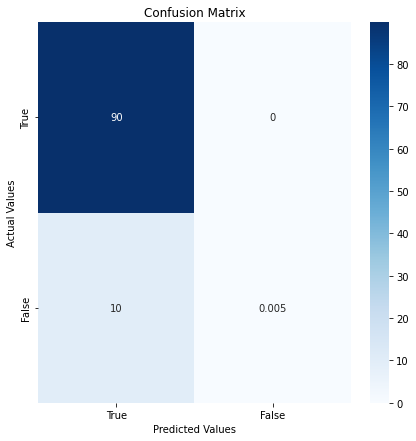

In [31]:
predict_rf = best_rf_model.predict(X_test)

f1_rf = drawConfusionMatrix(predict_rf, y_test)

### Результаты

In [32]:
index = ['LogisticRegression', 'XGBClassifier', 'RandomForestClassifier']

result_data = [
    {'time, s': 1*60+13, 'f1': f1_logistic},
    {'time, s': 12*60+8, 'f1': f1_xgb},
    {'time, s': 5*60+22, 'f1': f1_rf},
]

result_table = pd.DataFrame(result_data, index=index)
result_table

,"time, s",f1
LogisticRegression,73,0.749088
XGBClassifier,728,0.777504
RandomForestClassifier,322,0.000986


## Выводы

Был проведен первичный анализ данных, тест очищен от спецсимволов, тегов, стоп-слов и другой незначимой информации, проведена лемматизация. 

Построены три классификатора `LogisticRegression`, `XGBClassifier`, `RandomForestClassifier`

Наилучший результат по качеству получается при использовании `XGBClassifier` - для использования рекомендуется именно он.

Наилучший результат по скороти получается при использовании `LogisticRegression`, но он уступает по точности.


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны